In [1]:
#Code Block 1
## import libraries

import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Code Block 2
## load the embeddings

train_embeddings = pd.read_csv("data/embeddings/train_embeddings.csv")
test_embeddings = pd.read_csv("data/embeddings/test_embeddings.csv")

display(train_embeddings.head())
test_embeddings.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_505,feat_506,feat_507,feat_508,feat_509,feat_510,feat_511,race,gender,race_gender
0,0.843073,0.103579,0.224522,0.000000,0.778184,0.027723,0.454252,0.303014,0.029440,0.200618,...,0.150238,0.323468,0.784020,1.181147,0.422497,0.239257,0.723814,east asian,male,east asian_male
1,0.180621,1.292241,0.971825,0.132645,0.015272,0.305211,0.422381,0.379263,0.054428,0.007033,...,0.650830,2.343723,0.182173,0.085612,1.129795,0.638840,0.099425,indian,female,indian_female
2,0.012478,0.151712,0.666835,0.229115,0.108760,0.079838,0.191968,0.000000,0.269209,0.378046,...,0.322626,1.649574,0.019350,0.490857,0.762305,0.825264,0.454207,black,female,black_female
3,0.175503,0.309288,1.302044,0.065322,0.318755,0.151344,0.223482,0.075722,0.164445,0.174925,...,0.501732,0.948112,1.632882,0.479979,0.363495,0.169139,0.768003,indian,female,indian_female
4,0.066143,0.208480,1.062915,0.474760,0.000000,0.000000,0.041315,0.009158,0.053300,0.624211,...,0.697677,2.309969,0.987021,0.091093,0.343762,0.901343,0.149076,indian,female,indian_female


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_505,feat_506,feat_507,feat_508,feat_509,feat_510,feat_511,race,gender,race_gender
0,0.065531,0.145638,0.666353,0.022759,0.020042,0.494037,0.391600,0.896950,0.297403,0.009280,...,0.562256,2.478459,0.285622,0.006262,1.124570,0.688017,0.039207,east asian,male,east asian_male
1,0.243451,1.143462,0.491546,0.010157,0.837501,0.255487,0.135047,0.386226,0.206483,0.125620,...,0.512902,1.975987,1.487281,0.463475,0.126804,0.581827,1.107382,east asian,female,east asian_female
2,2.700191,0.768331,0.186618,0.144938,0.226986,0.147554,0.203444,0.365457,0.118876,0.453851,...,1.817159,2.202756,0.292811,1.336264,0.928382,1.471213,1.068437,white,male,white_male
3,0.268805,0.398621,0.796091,0.180213,0.054708,0.198172,0.698923,0.067774,0.119012,0.025534,...,0.371233,2.206412,0.518856,0.860804,0.407948,0.261468,0.428787,latino_hispanic,female,latino_hispanic_female
4,1.209170,0.045833,0.066622,0.145954,0.043286,0.019625,0.327715,0.143074,0.195398,0.843317,...,1.100869,2.160444,0.204243,0.440574,0.637311,0.233427,1.096583,southeast asian,male,southeast asian_male


### Gender Classification
#### Preparing the Data

In [3]:
#Code Block 3
## separate features and target

X_train = train_embeddings.drop(columns = ["gender", "race", "race_gender"])
y_train = train_embeddings["gender"]

X_test = test_embeddings.drop(columns = ["gender", "race", "race_gender"])
y_test = test_embeddings["gender"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((86744, 512), (86744,), (10954, 512), (10954,))

In [4]:
#Code Block 4
## train the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth = 10,
    random_state = 42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [5]:
#Code Block 5
## predict the test gender

y_pred = dt.predict(X_test)
y_pred[:10]

array(['female', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'female', 'female'], dtype=object)

In [6]:

#Code Block 6
## evaluate the gender model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7058608727405514

Classification Report:
               precision    recall  f1-score   support

      female       0.70      0.66      0.68      5162
        male       0.71      0.75      0.73      5792

    accuracy                           0.71     10954
   macro avg       0.71      0.70      0.70     10954
weighted avg       0.71      0.71      0.71     10954


Confusion Matrix:
 [[3414 1748]
 [1474 4318]]


In [7]:
#Code Block 7
## calculate performance across race groups
test_embeddings["pred_gender"] = y_pred
race_groups = test_embeddings["race"].unique()

for race in race_groups:
    subset = test_embeddings[test_embeddings["race"] == race]

    acc = accuracy_score(subset["gender"], subset["pred_gender"])

    print(f"\n Race: {race}")
    print(f"Accuracy: {acc:.3f}")
    print(confusion_matrix(subset["gender"], subset["pred_gender"]))


 Race: east asian
Accuracy: 0.717
[[560 213]
 [226 551]]

 Race: white
Accuracy: 0.721
[[679 284]
 [298 824]]

 Race: latino_hispanic
Accuracy: 0.726
[[569 261]
 [184 609]]

 Race: southeast asian
Accuracy: 0.694
[[465 215]
 [218 517]]

 Race: black
Accuracy: 0.639
[[376 381]
 [181 618]]

 Race: indian
Accuracy: 0.689
[[478 285]
 [187 566]]

 Race: middle eastern
Accuracy: 0.761
[[287 109]
 [180 633]]


In [8]:
#Code Block 8
## classification reports

for race in race_groups:
    subset = test_embeddings[test_embeddings["race"] == race]

    print(f"\nRace: {race}")
    print(classification_report(subset["gender"], subset["pred_gender"]))


Race: east asian
              precision    recall  f1-score   support

      female       0.71      0.72      0.72       773
        male       0.72      0.71      0.72       777

    accuracy                           0.72      1550
   macro avg       0.72      0.72      0.72      1550
weighted avg       0.72      0.72      0.72      1550


Race: white
              precision    recall  f1-score   support

      female       0.69      0.71      0.70       963
        male       0.74      0.73      0.74      1122

    accuracy                           0.72      2085
   macro avg       0.72      0.72      0.72      2085
weighted avg       0.72      0.72      0.72      2085


Race: latino_hispanic
              precision    recall  f1-score   support

      female       0.76      0.69      0.72       830
        male       0.70      0.77      0.73       793

    accuracy                           0.73      1623
   macro avg       0.73      0.73      0.73      1623
weighted avg       0

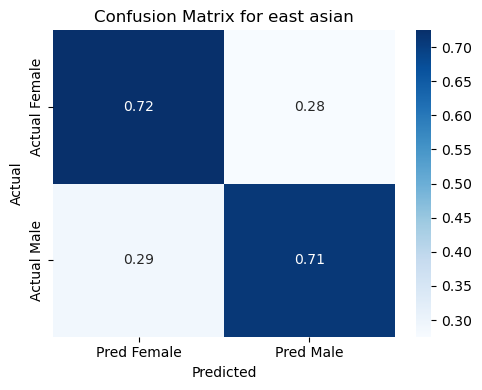

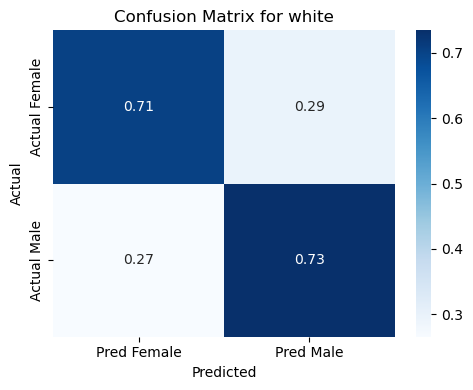

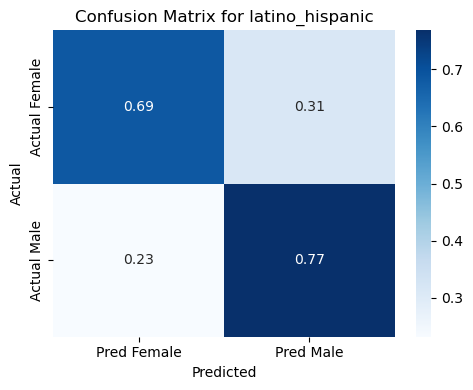

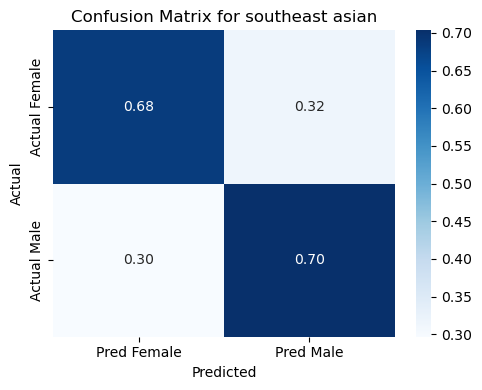

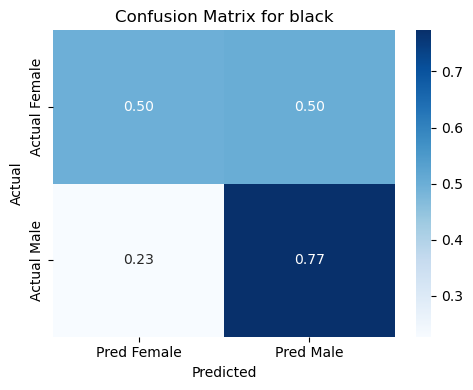

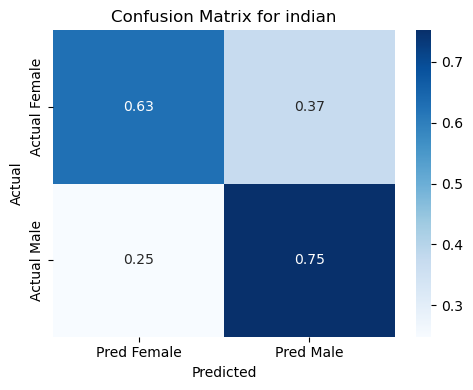

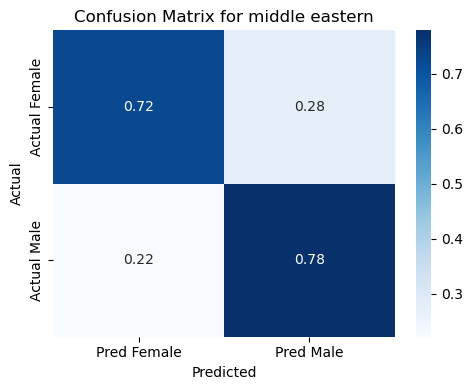

In [9]:
#Code Block 9
## visualizations of confusion matrices

races = test_embeddings["race"].unique()

for race in races:
    subset = test_embeddings[test_embeddings["race"] == race]

    y_true = subset["gender"]
    y_pred = subset["pred_gender"]

    cm = confusion_matrix(y_true, y_pred, labels = ["female", "male"])

    #Normalize by row (actual)
    cm_normalized = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]

    plt.figure(figsize = (5,4))
    sns.heatmap(cm_normalized, annot = True, fmt = ".2f", cmap = "Blues", xticklabels=["Pred Female", "Pred Male"], yticklabels=["Actual Female", "Actual Male"])
    plt.title(f"Confusion Matrix for {race}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.savefig(f"data/images/results/confusion_matrix_{race}.png")
    plt.show()

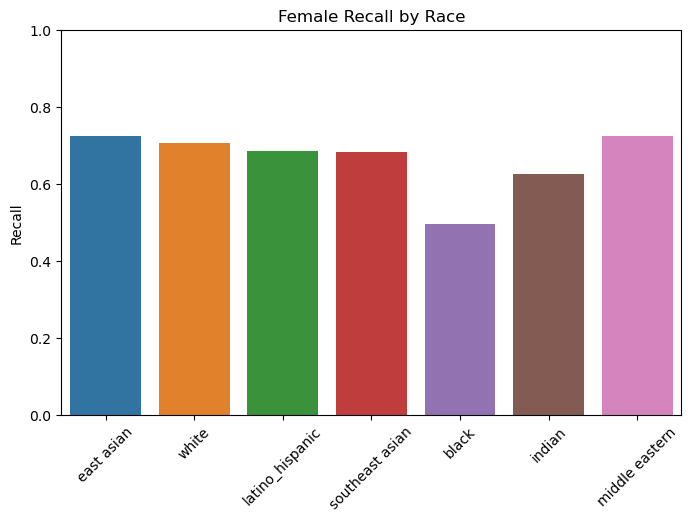

In [10]:
#Code Block 10
## barplot of female recall
female_recall = {}

for race in races:
    subset = test_embeddings[test_embeddings["race"] == race]
    cm = confusion_matrix(subset["gender"], subset["pred_gender"], labels=["female", "male"])
    recall_female = cm[0,0] / cm[0].sum()
    female_recall[race] = recall_female

plt.figure(figsize=(8,5))
sns.barplot(x=list(female_recall.keys()), y=list(female_recall.values()), hue = list(female_recall.keys()))
plt.xticks(rotation=45)
plt.title("Female Recall by Race")
plt.ylabel("Recall")
plt.ylim(0,1)
plt.savefig('data/images/results/female_recall_by_race.png')
plt.show()